## **Proyek Analisis Data: E-Commerce Public Dataset**


*   Nama : Muhammad Raihan Ramadhan
*   Email : muhammadraihan291003@gmail.com
*   ID Dicoding : muhammadraihan29





## **Menentukan Pertanyaan Bisnis**



*   whether all products sold have the same distribution or there are some products that have a higher distribution?
*   how is the pressing time of a product every day?
*   whether the order quantity of a product each day is in accordance with the order processing time each day?
* Are there customers who repurchase items that have been purchased by them before?





## **Import Semua Packages/Library yang Digunakan**

In [1]:
!pip install streamlit

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st




# **Data Wrangling**

### **Gatering data**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#load tabel customers
customers_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
#load tabel geolocation
geo_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/geolocation_dataset.csv")
geo_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [6]:
#load tabel produk
product_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/products_dataset.csv")
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [7]:
#load tabel produk category
productctg_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/product_category_name_translation.csv")
productctg_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [8]:
#create tabel orders
orders_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
#load tabel orderitem
items_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/order_items_dataset.csv")
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [10]:
#create tabel payment
payment_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/order_payments_dataset.csv")
payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [11]:
#load tabel riview
riview_df = pd.read_csv ("/content/drive/MyDrive/E-Commerce Public Dataset/order_reviews_dataset.csv")
riview_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [12]:
#Load tabel sallers
sallers_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/sellers_dataset.csv")
sallers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


## **Assessing Data**

### Menilai Data customers_df

In [13]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [14]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [15]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [16]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [17]:
# Mengecek apakah ada nilai yang hilang dalam DataFrame customer_df
missing_values = customers_df.isnull().any()

# Menampilkan hasil pengecekan
print("Apakah ada nilai yang hilang dalam DataFrame customer_df?")
print(missing_values)

Apakah ada nilai yang hilang dalam DataFrame customer_df?
customer_id                 False
customer_unique_id          False
customer_zip_code_prefix    False
customer_city               False
customer_state              False
dtype: bool


### Menilai Data produk geo_df

In [18]:
geo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [19]:
print("Jumlah duplikasi: ", geo_df.duplicated().sum())

geo_df.describe()

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [20]:
# Mengecek apakah ada nilai yang hilang dalam DataFrame geo_df
missing_values = geo_df.isnull().any()

# Menampilkan hasil pengecekan
print("Apakah ada nilai yang hilang dalam DataFrame geo_df?")
print(missing_values)

Apakah ada nilai yang hilang dalam DataFrame geo_df?
geolocation_zip_code_prefix    False
geolocation_lat                False
geolocation_lng                False
geolocation_city               False
geolocation_state              False
dtype: bool


### Menilai Data produk_df

In [21]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [22]:
print("Jumlah duplikasi: ", product_df.duplicated().sum())

product_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [23]:
# Mengecek apakah ada nilai yang hilang dalam DataFrame product_df
missing_values = product_df.isnull().any()

# Menampilkan hasil pengecekan
print("Apakah ada nilai yang hilang dalam DataFrame product_df?")
print(missing_values)

Apakah ada nilai yang hilang dalam DataFrame product_df?
product_id                    False
product_category_name          True
product_name_lenght            True
product_description_lenght     True
product_photos_qty             True
product_weight_g               True
product_length_cm              True
product_height_cm              True
product_width_cm               True
dtype: bool


### Menilai Data productctg_df

In [24]:
productctg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [25]:
print("Jumlah duplikasi: ", productctg_df.duplicated().sum())

productctg_df.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [26]:
# Mengecek apakah ada nilai yang hilang dalam DataFrame productctg_df
missing_values = productctg_df.isnull().any()

# Menampilkan hasil pengecekan
print("Apakah ada nilai yang hilang dalam DataFrame productctg_df?")
print(missing_values)

Apakah ada nilai yang hilang dalam DataFrame productctg_df?
product_category_name            False
product_category_name_english    False
dtype: bool


### Menilai Data order_df

In [27]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [28]:
print("Jumlah duplikasi: ",orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [29]:
# Mengecek apakah ada nilai yang hilang dalam DataFrame orders_df
missing_values = orders_df.isnull().any()

# Menampilkan hasil pengecekan
print("Apakah ada nilai yang hilang dalam DataFrame orders_df?")
print(missing_values)

Apakah ada nilai yang hilang dalam DataFrame orders_df?
order_id                         False
customer_id                      False
order_status                     False
order_purchase_timestamp         False
order_approved_at                 True
order_delivered_carrier_date      True
order_delivered_customer_date     True
order_estimated_delivery_date    False
dtype: bool


### Menilai Data OrderItems

In [30]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [31]:
print("Jumlah duplikasi: ",items_df.duplicated().sum())
items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [32]:
# Mengecek apakah ada nilai yang hilang dalam DataFrame items_df
missing_values = items_df.isnull().any()

# Menampilkan hasil pengecekan
print("Apakah ada nilai yang hilang dalam DataFrame items_df?")
print(missing_values)

Apakah ada nilai yang hilang dalam DataFrame items_df?
order_id               False
order_item_id          False
product_id             False
seller_id              False
shipping_limit_date    False
price                  False
freight_value          False
dtype: bool


### Menilai Data payment_df

In [33]:
payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [34]:
print("Jumlah duplikasi: ",payment_df.duplicated().sum())
payment_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [35]:
# Mengecek apakah ada nilai yang hilang dalam DataFrame payment_df
missing_values = payment_df.isnull().any()

# Menampilkan hasil pengecekan
print("Apakah ada nilai yang hilang dalam DataFrame payment_df?")
print(missing_values)

Apakah ada nilai yang hilang dalam DataFrame payment_df?
order_id                False
payment_sequential      False
payment_type            False
payment_installments    False
payment_value           False
dtype: bool


### Menilai Data review_df

In [36]:
riview_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [37]:
print("Jumlah duplikasi: ",riview_df.duplicated().sum())
riview_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [38]:
# Mengecek apakah ada nilai yang hilang dalam DataFrame riview_df
missing_values = riview_df.isnull().any()

# Menampilkan hasil pengecekan
print("Apakah ada nilai yang hilang dalam DataFrame riview_df?")
print(missing_values)

Apakah ada nilai yang hilang dalam DataFrame riview_df?
review_id                  False
order_id                   False
review_score               False
review_comment_title        True
review_comment_message      True
review_creation_date       False
review_answer_timestamp    False
dtype: bool


### Menilai Data sellers_df

In [39]:
sallers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [40]:
print("Jumlah duplikasi: ",sallers_df.duplicated().sum())
sallers_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [41]:
# Mengecek apakah ada nilai yang hilang dalam DataFrame sallers_df
missing_values = sallers_df.isnull().any()

# Menampilkan hasil pengecekan
print("Apakah ada nilai yang hilang dalam DataFrame sallers_df?")
print(missing_values)

Apakah ada nilai yang hilang dalam DataFrame sallers_df?
seller_id                 False
seller_zip_code_prefix    False
seller_city               False
seller_state              False
dtype: bool


## **Data Cleaning**

### product_df

In [42]:
# Menampilkan jumlah nilai yang hilang dalam setiap kolom DataFrame product_df
missing_values_count = product_df.isnull().sum()


In [43]:
# Menampilkan kolom-kolom yang memiliki nilai yang hilang
print("Kolom-kolom dengan nilai yang hilang dalam DataFrame product_df:")
print(missing_values_count[missing_values_count > 0])

Kolom-kolom dengan nilai yang hilang dalam DataFrame product_df:
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


In [44]:
# Mengisi nilai-nilai yang hilang dengan nilai rata-rata
# Misalnya, menggunakan fillna() dengan nilai rata-rata untuk setiap kolom
product_df.fillna(product_df.mean(), inplace=True)

<ipython-input-44-ec3d7b09b680>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  product_df.fillna(product_df.mean(), inplace=True)


### Order_df

In [45]:
# Menampilkan jumlah duplikasi
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

# Menghapus duplikasi
orders_df.drop_duplicates(inplace=True)

Jumlah duplikasi:  0


In [46]:
# Validasi nilai dalam kolom tertentu
orders_df['order_status'].unique()
orders_df['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

### Review_df

In [47]:
# Mengisi nilai-nilai pada tabel review_df yang hilang dengan string kosong ''
riview_df['review_comment_title'].fillna('', inplace=True)
riview_df['review_comment_message'].fillna('', inplace=True)

In [48]:
# Mengecek apakah ada nilai yang hilang dalam DataFrame riview_df
missing_values = riview_df.isnull().any()

# Menampilkan hasil pengecekan
print("Apakah ada nilai yang hilang dalam DataFrame riview_df?")
print(missing_values)

Apakah ada nilai yang hilang dalam DataFrame riview_df?
review_id                  False
order_id                   False
review_score               False
review_comment_title       False
review_comment_message     False
review_creation_date       False
review_answer_timestamp    False
dtype: bool


### geo_df

In [49]:
# Menghapus duplikat data dari DataFrame geo_df
geo_df.drop_duplicates(inplace=True)

# **Exploratory Data Analysis (EDA)**

## Eksplorasi Data customers_df

In [50]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [51]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [52]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

## Eksplorasi Data payment_df

In [53]:
payment_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [54]:
payment_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

## Eksplorasi Data order_df

In [55]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


### Eksplorasi Data customers_df and order_df

In [56]:
customer_id_in_orders_df = set(orders_df["customer_id"])
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")


In [57]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active


In [58]:
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


In [59]:
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: order_id, dtype: int64

## Explorasi Items_df and product_df

In [60]:
items_product_df = pd.merge(
    left=items_df,
    right=product_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
items_product_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


### Eksplorasi Data product_df and productctg_df

In [61]:
product_df = pd.merge(
    left=product_df,
    right=productctg_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [62]:
product_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: product_id, dtype: int64

In [63]:
product_df.groupby(by="product_photos_qty").product_id.nunique().sort_values(ascending=False).head(10)

product_photos_qty
1.000000    16489
2.000000     6263
3.000000     3860
4.000000     2428
5.000000     1484
6.000000      968
2.188986      610
7.000000      343
8.000000      192
9.000000      105
Name: product_id, dtype: int64

##Explorasi geo_df


In [65]:
geo_df.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332.000000,738332.000000,738332.000000,738332,738332
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38316.086800,-20.998353,-46.461098,NaN,NaN
std,30632.496675,5.892315,4.393705,NaN,NaN
min,1001.000000,-36.605374,-101.466766,NaN,NaN
25%,12600.000000,-23.603061,-48.867822,NaN,NaN
50%,29144.000000,-22.873588,-46.647278,NaN,NaN
75%,65950.000000,-19.923336,-43.836974,NaN,NaN


In [66]:
geo_df.groupby(by="geolocation_city").geolocation_zip_code_prefix	.nunique().sort_values(ascending=False).reset_index().head(10)

,geolocation_city,geolocation_zip_code_prefix
0,sao paulo,3171
1,são paulo,3013
2,brasilia,496
3,brasília,406
4,rio de janeiro,404
5,salvador,275
6,goiania,233
7,goiânia,210
8,belo horizonte,205
9,fortaleza,172


In [67]:
geo_df[geo_df['geolocation_zip_code_prefix'] == 3171]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
44778,3171,-23.551841,-46.588703,sao paulo,SP
44884,3171,-23.551515,-46.589093,sao paulo,SP
45005,3171,-23.550271,-46.591300,sao paulo,SP
45098,3171,-23.552441,-46.587929,sao paulo,SP
45413,3171,-23.550260,-46.591290,sao paulo,SP
45657,3171,-23.548789,-46.590722,sao paulo,SP
45720,3171,-23.551991,-46.588512,sao paulo,SP
45941,3171,-23.552088,-46.588393,sao paulo,SP
46411,3171,-23.547869,-46.592187,são paulo,SP
46610,3171,-23.551841,-46.588703,são paulo,SP


## Menggabungkan semua data yang telah dieksplorasi

In [68]:
print("Kolom di product_df:")
print(orders_customers_df.columns)

Kolom di product_df:
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'status'],
      dtype='object')


In [69]:
# Memeriksa nama kolom di DataFrame orders_customers_df
print("\nKolom di orders_customers_df:")
print(items_product_df.columns)


Kolom di orders_customers_df:
Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')


In [71]:
all_df = pd.merge(
    left=orders_customers_df,
    right=items_product_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,...,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0


In [72]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113425 entries, 0 to 113424
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113425 non-null  object 
 1   customer_id                    113425 non-null  object 
 2   order_status                   113425 non-null  object 
 3   order_purchase_timestamp       113425 non-null  object 
 4   order_approved_at              113264 non-null  object 
 5   order_delivered_carrier_date   111457 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  113425 non-null  object 
 8   customer_unique_id             113425 non-null  object 
 9   customer_zip_code_prefix       113425 non-null  int64  
 10  customer_city                  113425 non-null  object 
 11  customer_state                 113425 non-null  object 
 12  status                        

In [74]:
all_df.groupby(by="product_category_name").agg({
    "order_id": "nunique",
    "order_status":  ["min", "max"]
})

order_id order_status           
                           nunique          min        max
product_category_name                                     
agro_industria_e_comercio      182    delivered    shipped
alimentos                      450     canceled    shipped
alimentos_bebidas              227     canceled    shipped
artes                          202     canceled    shipped
artes_e_artesanato              23    delivered  delivered
...                            ...          ...        ...
sinalizacao_e_seguranca        140    delivered    shipped
tablets_impressao_imagem        79    delivered  delivered
telefonia                     4199     canceled    shipped
telefonia_fixa                 217     canceled    shipped
utilidades_domesticas         5884     approved    shipped

[73 rows x 3 columns]

In [75]:
all_df.groupby(by="product_id").agg({
    "product_category_name": "nunique",
    "price":  ["min", "max"]
})

product_category_name   price        
                                               nunique     min     max
product_id                                                            
00066f42aeeb9f3007548bb9d3f33c38                     1  101.65  101.65
00088930e925c41fd95ebfe695fd2655                     1  129.90  129.90
0009406fd7479715e4bef61dd91f2462                     1  229.00  229.00
000b8f95fcb9e0096488278317764d19                     1   58.90   58.90
000d9be29b5207b54e86aa1b1ac54872                     1  199.00  199.00
...                                                ...     ...     ...
fff6177642830a9a94a0f2cba5e476d1                     1  109.99  119.99
fff81cc3158d2725c0655ab9ba0f712c                     1   90.00   90.00
fff9553ac224cec9d15d49f5a263411f                     1   32.00   32.00
fffdb2d0ec8d6a61f0a0a0db3f25b441                     1   29.99   34.99
fffe9eeff12fcbd74a2f2b007dde0c58                     1  249.99  249.99

[32951 rows x 3 columns]

# **Visualisasi dan Explanatory Analysis**

1. whether all products sold have the same distribution or there are some products that have a higher distribution?

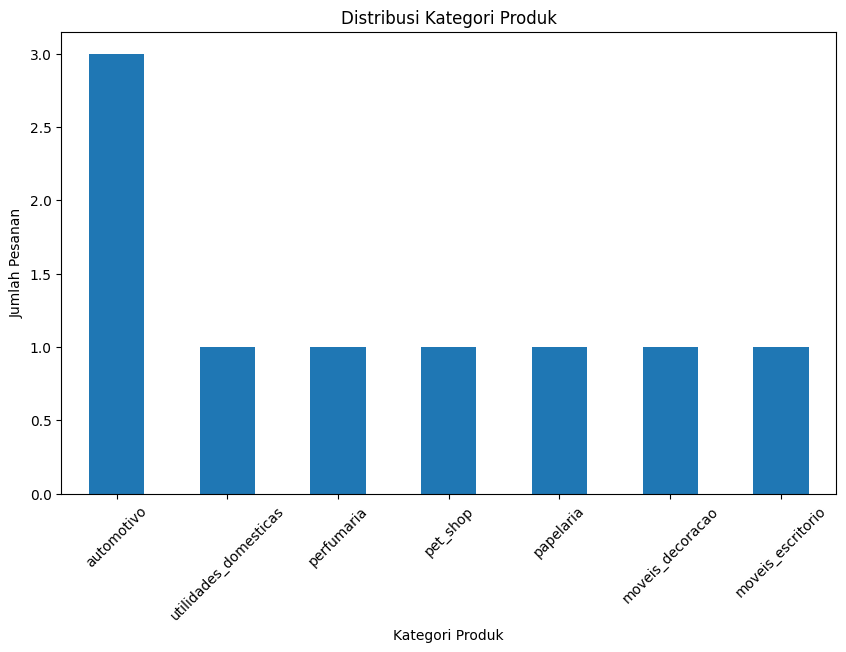

In [81]:
plt.figure(figsize=(10, 6))
all_df.head(10)['product_category_name'].value_counts().plot(kind='bar')
plt.title('Distribusi Kategori Produk')
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45)
plt.show()

## **Conclusion 1 : there is one product that has a better category distribution**

2. how is the pressing time of a product every day?

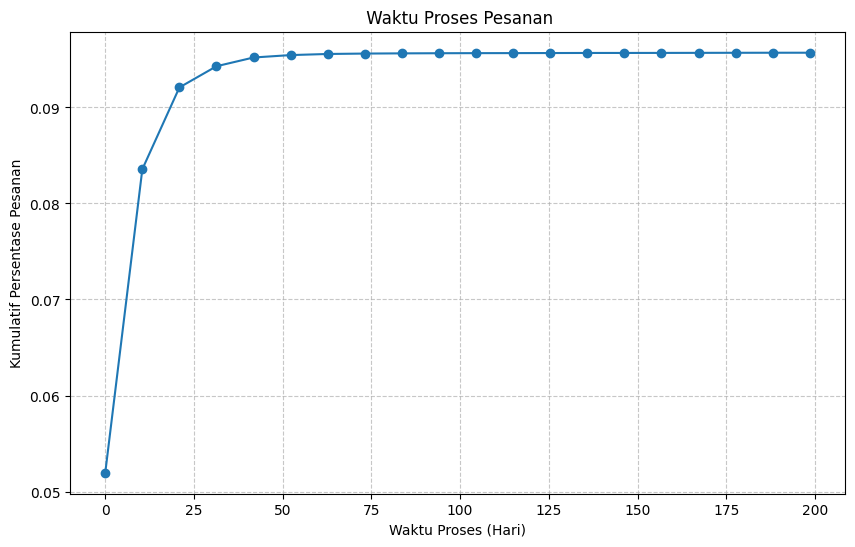

In [100]:
# Konversi waktu ke dalam hari
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])
all_df['order_delivered_customer_date'] = pd.to_datetime(all_df['order_delivered_customer_date'])
all_df['order_processing_time'] = (all_df['order_delivered_customer_date'] - all_df['order_purchase_timestamp']).dt.days

# Hitung distribusi
hist, bins = np.histogram(all_df['order_processing_time'].dropna(), bins=20, density=True)

# Hitung distribusi kumulatif
cumulative_hist = np.cumsum(hist)

# Plot distribusi kumulatif
plt.figure(figsize=(10, 6))
plt.plot(bins[:-1], cumulative_hist, marker='o', linestyle='-')
plt.title(' Waktu Proses Pesanan')
plt.xlabel('Waktu Proses (Hari)')
plt.ylabel('Kumulatif Persentase Pesanan')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## **Conclusion 2 : the process time of the order process every day has a significant increase and is also stable **

3. whether the order quantity of a product each day is in accordance with the order processing time each day?

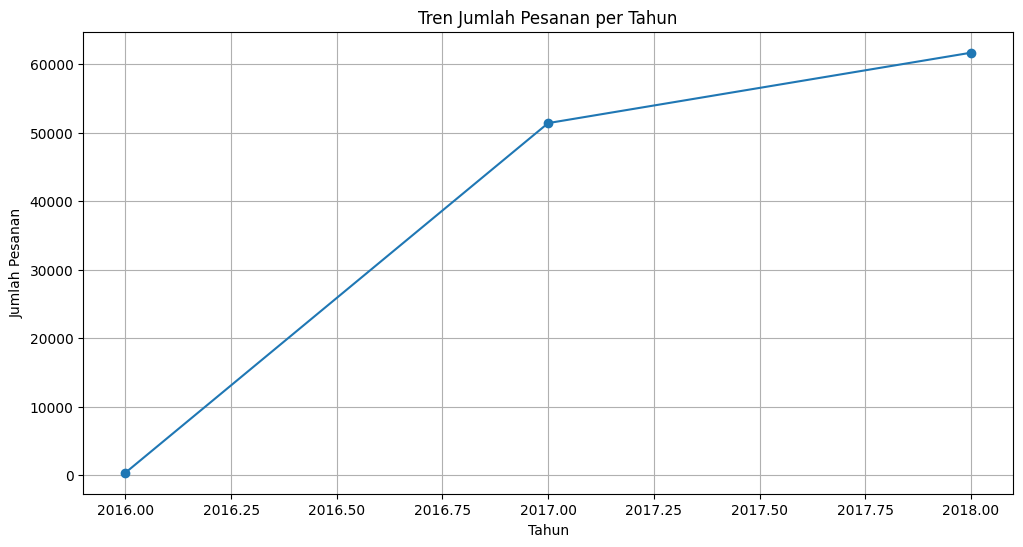

In [97]:
# Konversi kolom order_purchase_timestamp ke format datetime
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])

# Ekstrak tahun dari kolom order_purchase_timestamp
all_df['order_year'] = all_df['order_purchase_timestamp'].dt.year

# Hitung jumlah pesanan per tahun
orders_per_year = all_df.groupby('order_year')['order_id'].count()

# Visualisasi tren jumlah pesanan per tahun
plt.figure(figsize=(12, 6))
orders_per_year.plot(marker='o')
plt.title('Tren Jumlah Pesanan per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pesanan')
plt.grid(True)
plt.show()

## **Conclusion 3 :the trend of the number of orders each year has increased from year to year**

4. Are there customers who repurchase items that have been purchased by them before?

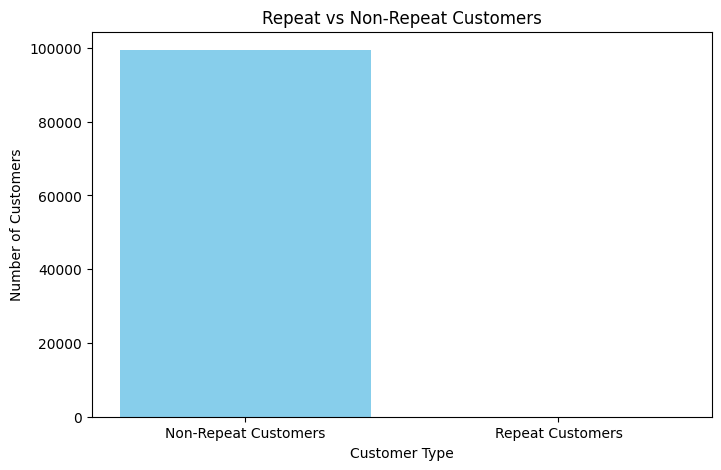

In [99]:
customer_purchase_count = all_df.groupby('customer_id')['order_id'].nunique()

repeat_customers_count = (customer_purchase_count > 1).sum()

plt.figure(figsize=(8, 5))
plt.bar(['Non-Repeat Customers', 'Repeat Customers'], [len(customer_purchase_count) - repeat_customers_count, repeat_customers_count], color=['skyblue', 'orange'])
plt.title('Repeat vs Non-Repeat Customers')
plt.xlabel('Customer Type')
plt.ylabel('Number of Customers')
plt.show()

## **Conclusion 4 : it turns out that all customers who have bought the product never buy the product again.**

In [101]:
all_df.to_csv("all_data.csv", index=False)